<a href="https://colab.research.google.com/github/WMFrts/aprendizagem-bayesiana/blob/main/aprendizagem_bayesiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center>APRENDIZAGEM BAYESIANA</center></h2>


<hr size="1" width="100%" align="center" noshade>



<p align = 'JUSTIFY'>O aprendizado bayesiano é do tipo supervisionado, já que são fornecidas ao algoritmo de aprendizado de máquina as instâncias juntamente com seus rótulos (ou seja, as classes). Seguindo o paradigma estatístico, o algoritmo faz uso de fórmulas estatísticas e cálculo de probabilidades para realizar a classificação (Mitchell, 1997). </p>


In [ ]:
!pip install plotly

In [ ]:
# Importação de Bibliotecas

import pandas as pd
import numpy as np 
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Criação de variável que recebe pd (já importado) com a função de leitura 
#do arquivo, read_csv

base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [ ]:
# Com base nos quatro previsores - história, dívida, garantias e renda - 
#o objetivo é prever o risco de conceder um empréstimo a um determinado cliente

base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
# Antes, é necessário fazer o pré-processamento dos dados

# Primeiramente, serão criadas variáveis para armazenar, separadamente, 
#os atributos previsores (variável x), enquanto outra variável 
#irá armazenar a classe (variável y)


x_risco_credito = base_risco_credito.iloc[:,0:4].values


# .iloc[:,0:4].values: seleciona os registros em todas as linhas 
# da coluna 0 até a 4 e converte para o formato numpy array com '.values'

x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
# A criação da variável 'y' segue processo semelhante

y_risco_credito = base_risco_credito.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
# O próximo passo, para evitar o retorno de erros na aplicação de algoritmos, 
#é converter os dados categóricos em numéricos.
# Para tanto, será utilizado o utilitário LabelEncoder da biblioteca scikit-learn.

# Após a importação, são criadas variáveis para cada um dos, 
#até então, atributos categóricos


from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()



In [ ]:
# Nesse momento, serão aplicados os processamentos

# fit: calcula a média e o padrão para serem usados ​​em redimensionamentos futuros

# transform: usa uma média e std previamente calculadas para dimensionar automaticamente os dados 
#(subtrair a média de todos os valores e depois dividi-la por std).

# fit_transform: faz as duas coisas ao mesmo tempo. 

x_risco_credito[:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_encoder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3])

In [ ]:
#Agora, observa-se que os atributos são apenas numéricos

x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
# Para essa base de dados não será utilizado o OneHotEncoder.

# One Hot encoding é uma transformação utilizada nos dados
#para que variáveis categóricas sejam representadas de 
#forma binária. Acaba por indicar existência ou não de um valor.

'\nPara essa base de dados não será utilizado o OneHotEncoder.\n\nOne Hot encoding é uma transformação utilizada nos dados\npara que variáveis categóricas sejam representadas de \nforma binária. Acaba por indicar existência ou não de um valor.\n\n'

In [ ]:
# Para salvar as variáveis, bases de dados a fim de utilizá-los nos algoritmos:

import pickle

In [ ]:
# Definição do nome do arquivo onde será salvo com a devida extensão .pkl
# Aplica o comando pickle.dump com as variáveis em forma de lista que serão salvas


with open ('risco_credito.pkl', mode = 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)
  

In [ ]:
# Será utilizada a classe GaussianNB do pacote Naive Bayes
#da biblioteca sklearn com a criação de uma variável 
#que irá receber o algoritmo GaussianNB.

# Para geração da tabela de probabilidades - treinamento -
#do algoritmo, será utilizada a função fit com os devidos parâmetros

naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
# Com utilização do seguinte histórico, será possível prever
#o risco relacionado ao pedido do cliente:

#história boa(0), dívida alta(0), garantia nenhuma(1), renda > 35 (2)
#história ruim(2), dívida alta(0), garantia adequada(0), renda < 15 (0)

# Os valores dentro dos parênteses são o resultado da
#conversão de x_risco_credito de categóricos para numéricos

# predict é um função que retorna apenas a classe com os devidos parêmetros
#de risco informados

previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

In [ ]:
# Por exemplo, um cliente com os seguintes dados históricos, teria risco 
#de crédito considerado baixo

# história boa(0), dívida alta(0), garantia nenhuma(1), renda > 35 (2)

previsao = naive_risco_credito.predict([[0, 0, 1, 2]])
previsao

array(['baixo'], dtype='<U8')

In [ ]:
# É possível ainda saber quais são as classes

naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
# E também quantos atributos estão em cada classe

naive_risco_credito.class_count_

array([6., 5., 3.])

In [ ]:
# Bem como a probabilidade apriori, atribuída a um ou mais eventos 
#independente da realização de um experimento.

naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

UTILIZAÇÃO DA BASE CREDIT DATA

In [ ]:
# Função 'open' que recebe como primeiro parâmetro 
#o nome do arquivo e, como segundo parâmetro, 
#a idicação de que será feita a leitura, 'rb'

with open ('credit.pkl', 'rb') as f:
   x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
# O treinamento será feito com 1500 registros

x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
# O teste será feito com 500 registros

x_credit_teste.shape , y_credit_teste.shape

((500, 3), (500,))

In [ ]:
# Será utilizada a classe GaussianNB do pacote Naive Bayes
#da biblioteca sklearn com a criação de uma variável 
#que irá receber o algoritmo GaussianNB.

#Para geração da tabela de probabilidades - treinamento do algoritmo


# Na função fit, primeiro passa como parâmetro a variável que representa
#os atributos previsores, depois, a variável que indica o atributo esperado


naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
# Com o algoritmo já treinado, é possível fazer as previsões dos
#registros que não sabemos a quais classes pertencem 

# Obs: obviamente a base teste servirá de parâmetro

previsoes = naive_credit_data.predict(x_credit_teste)

In [ ]:
# Respostas do algoritmo

previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# A fim de comparar as previsões com os dados reais
#que estão na variável y_credit_teste, será importada 
#a função accuracy_score do pacote metrics da biblioteca sklearn

# Também pode ser gerada uma matriz de confusão,
#pois, é uma tabela que permite a visualização do 
#desempenho de um algoritmo de classificação. 

# Para retorno de algumas métricas: classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# A função accuracy_score recebe dois parâmetros. 
# O primeiro diz respeito ao y_true (são os dados reais),
#já o segundo, é o y_pred (são as previsões do algoritmo)

# O resultado indicará o valor de acerto da previsão

accuracy_score(y_credit_teste, previsoes)

0.938

In [ ]:
# A linha 0 [428,  8] indica os clientes que pagam o empréstimo.
#Essa linha informa que 428 clientes pagam e foram classificados 
#da maneira correta. Já 8 clientes que pagam, foram classificados 
#como clientes que não puderam pagar

# Já a linha 1 [23, 41], indica os clientes que não puderam
#pagar. Nessa linha, há indicação de 23 clientes que não 
#puderam pagar, mas foram erroneamente considerados como clientes
#que pagam. No entando, 41 clientes não puderam pagar e foram 
#classificados de acordo com a esta situação. 


confusion_matrix(y_credit_teste, previsoes)


array([[428,   8],
       [ 23,  41]])

In [ ]:
# Com a biblioteca yellowbrik é possível deixar a visualização mais clara

from yellowbrick.classifier import ConfusionMatrix

0.938

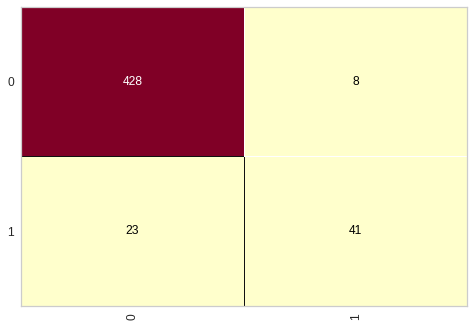

In [ ]:
# Para isso, cria-se uma variável cm e instância-se 
#ConfusionMatrix com o nome do algoritmo (naive_credit_data)
#É necessário fazer novamente o treinamento, por isso a função fit
#com os parâmetros



cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)


# Para analisar a imagem, pode-se relacionar o binários
#da vertical(dados reais) com os da horizontal (previsões),
#relacioná-los e concluir sobre os erros ou acertos

#Assim:

# O número 0 da vertical indica clientes que pagaram, já o número
#1, também da vertical, indica quem não pode pagar.

# Em relação aos números da horizontal, o 0 indica que a
#algoritmo previu que o cliente pagou, já o número 1 está relacionado
#a previsão de que o cliente não pagou

# Como exemplo, 428, está com idicação de 0 na vertical, então, 
#são as pessoas que realmente pagaram. Enquanto a indicação na vertical
#também é 0, ou seja, o algoritmo também previu que pagaram. 

# Um ponto relevante após a verificação das relações é que, 
#apesar da previsão indicar 0.938, a maior parte está relacionada 
#ao valor 428. Ou seja, foi uma boa alternativa para indicar os
#clientes que pagam, porém não é a melhor opção para apontar 
#os clientes que não puderam pagar


In [ ]:
# Para retorno de algumas métricas, classification_report
#com os parâmetros da realidade em relação as
#previsões

# Observa-se, na coluna recall, que ococorre identificação 
#de apenas 64% dos clientes que não pagam. E quando isso 
#ocorre a precisão é de 84%

print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500

